### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [124]:
import pandas as pd
import numpy as np
import matplotlib as mlt
%matplotlib inline

In [125]:
from sklearn.datasets import load_boston

In [126]:
boston = load_boston()

In [127]:
boston_data = boston.data

In [128]:
X = pd.DataFrame(boston_data, columns=boston.feature_names)

In [129]:
y = pd.DataFrame(boston.target, columns=['Price'])

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [133]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [134]:
from sklearn.manifold import TSNE

In [135]:
t_sne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [136]:
X_train_tsne = t_sne.fit_transform(X_train_scaled)

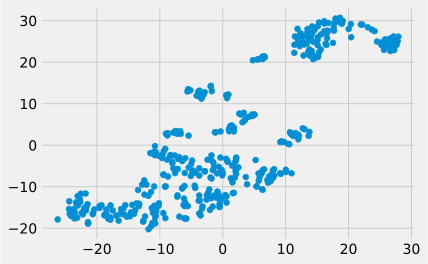

In [137]:
mlt.pyplot.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
mlt.pyplot.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [138]:
from sklearn.cluster import KMeans

In [139]:
k_means = KMeans(n_clusters=3, max_iter=100, random_state=42)
train_labels = k_means.fit_predict(X_train)


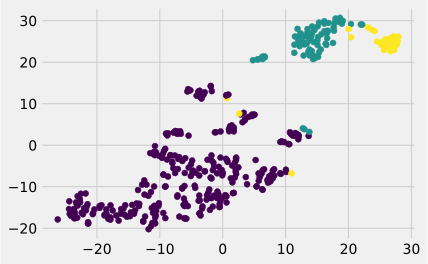

In [140]:
mlt.pyplot.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)

In [141]:
Crim_Price_train = pd.DataFrame({'CRIM': [X_train[train_labels == 0]['CRIM'].mean(), 
                                          X_train[train_labels == 1]['CRIM'].mean(),
                                          X_train[train_labels == 2]['CRIM'].mean()],
                                 'Price': [y_train[train_labels == 0]['Price'].mean(),
                                           y_train[train_labels == 1]['Price'].mean(),
                                           y_train[train_labels == 2]['Price'].mean()]})
Crim_Price_train

,CRIM,Price
0,0.404863,25.168687
1,11.745662,17.442105
2,14.360380,13.196774


### * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

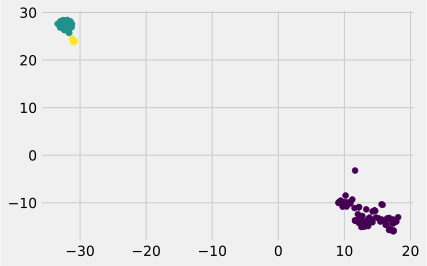

In [142]:
test_labels = k_means.predict(X_test)
X_test_tsne = t_sne.fit_transform(X_test)
mlt.pyplot.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_labels)

In [143]:
Crim_Price_test = pd.DataFrame({'CRIM': [X_test[test_labels == 0]['CRIM'].mean(), 
                                    X_test[test_labels == 1]['CRIM'].mean(),
                                    X_test[test_labels == 2]['CRIM'].mean()],
                           'Price': [y_test[test_labels == 0]['Price'].mean(),
                                     y_test[test_labels == 1]['Price'].mean(),
                                     y_test[test_labels == 2]['Price'].mean()]})
Crim_Price_test

,CRIM,Price
0,0.246421,23.911594
1,8.469302,17.392308
2,19.021666,12.814286


### Выводы
По карайней мере видно, что признаки имеют обратную зависимость, а именно, где значение признака Crim ниже там цена выше.